In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

filepath = "/Users/eshwarchandrasekharan/Desktop/repo/predict-pop/models-links/"
train_df = pd.read_csv(filepath + 'radshift_links_cross_posting_info.csv')

In [7]:
predictor_vars = ['consumptions_by_type__link_clicks', 'stories_by_action_type__share']
response_vars = ['twoday_consumptions_by_type__link_clicks', 'twoday_stories_by_action_type__share']

In [14]:
# y = train_df[predictor_vars]
y = train_df[response_vars]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10e83f5c0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10e981198>]], dtype=object)

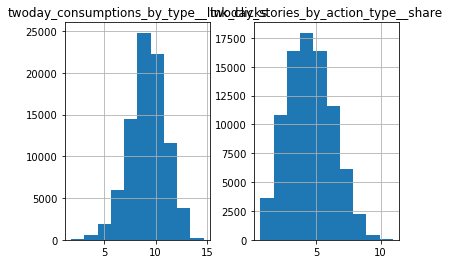

In [15]:
import numpy as np
np.log(y+1).hist()